In [1]:
import pandas as pd
import matplotlib as ply

In [2]:
df = pd.read_csv(r"C:\Users\Rawoo\Documents\Data sets\netflix_titles.csv")

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df = df.dropna(subset=['rating','duration'])

In [5]:
df.loc[:, 'country'] = df['country'].fillna('Unknown')
df.loc[:, 'cast'] = df['cast'].fillna('Not Available')
df.loc[:, 'director'] = df['director'].fillna('Not Available')

In [7]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies.loc[:, 'duration_mins'] = df_movies['duration'].str.replace(' min', '').astype(int)


In [9]:
df_trend = df.groupby(['release_year','type']).size().unstack()

<Figure size 1200x600 with 0 Axes>

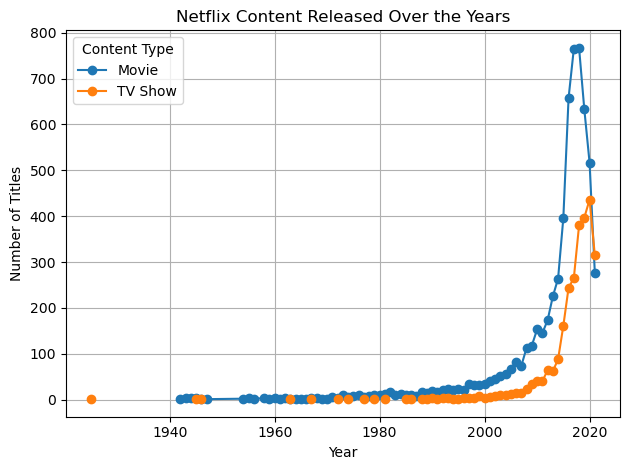

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df_trend.plot(kind='line', marker='o')
plt.title("Netflix Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()

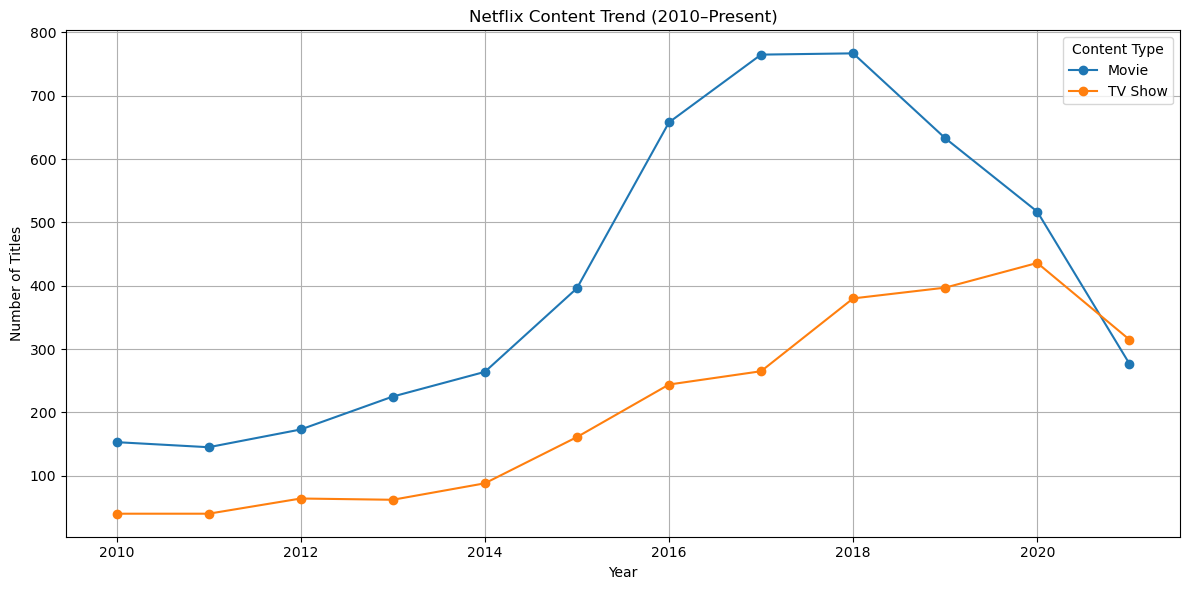

In [16]:
df_recent = df[df['release_year'] >= 2010]
df_trend_recent = df_recent.groupby(['release_year', 'type']).size().unstack()

df_trend_recent.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Netflix Content Trend (2010–Present)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


In [18]:
# Combine all genres into one big list
all_genres = df['listed_in'].str.split(', ').explode()

# Count the most common genres
top_genres = all_genres.value_counts().head(15)

print(top_genres)


listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  580
Thrillers                    577
Crime TV Shows               470
Kids' TV                     450
Docuseries                   395
Name: count, dtype: int64


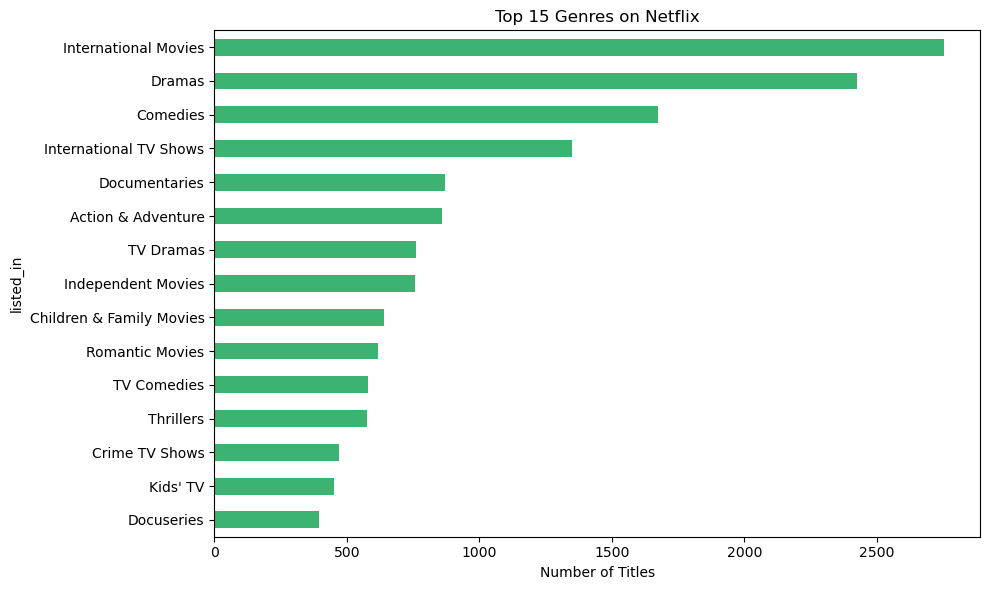

In [19]:
plt.figure(figsize=(10,6))
top_genres.plot(kind='barh', color='mediumseagreen')
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()